In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset/two_type'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2

import PIL.Image as Image
import os
from glob import glob

import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D


import glob
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = "/content/drive/MyDrive/dataset/two_type/train"
test_data = "/content/drive/MyDrive/dataset/two_type/test"

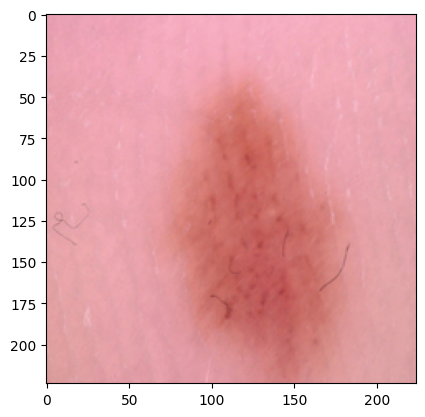

In [ ]:
import matplotlib.image as Mimg
img = Mimg.imread('/content/drive/MyDrive/dataset/two_type/test/benign/1013.jpg')
plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_data,
                                               target_size =(224,224),
                                               class_mode = "categorical",
                                               batch_size =32)
test_data = test_datagen.flow_from_directory(directory = test_data,
                                               target_size =(224,224),
                                               class_mode = "categorical",
                                               batch_size =32)

Found 3857 images belonging to 3 classes.
Found 927 images belonging to 3 classes.


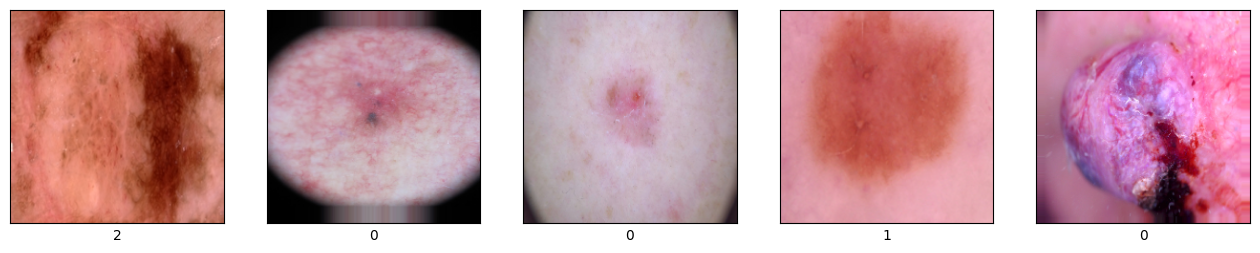

In [ ]:
from tensorflow.keras.preprocessing import image
sample_x, sample_y = next(train_data)
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = image.img_to_array(sample_x[i])
    plt.imshow(img)
    plt.xlabel(np.argmax(sample_y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet121 model without top classification layer
base_model = inceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can adjust the number of units as needed
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes, modify based on your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


29084464/29084464 [==============================] - 0s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
base_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

base_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
#tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience= 3 , verbose=1)""

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,  restore_best_weights=True)
#mc = ModelCheckpoint('saved_best_cnn_model' , save_weights_only=True, save_best_only=True, verbose=1)
callback = [es]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have already defined your train_data and test_data generators

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [early_stopping]

# Train the model
history = model.fit_generator(train_data, validation_data=test_data, epochs=30)


In [ ]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
hist_df = pd.DataFrame(base_model.history.history)
hist_df.head()

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(base_model.history.history["accuracy"])
plt.plot(base_model.history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [ ]:
plt.figure()
plt.plot(base_model.history.history["loss"])
plt.plot(base_model.history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(' DenseNet.h5')

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/dataset/two_type/train/Basal cell carcinoma/ISIC_0024582.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image data

# Make predictions
predictions = model.predict(img)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
class_labels = ["basal cell carcinogens", "benign", "melenoma"]  # Replace with your class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class Label:", predicted_class_label)


Found 927 images belonging to 3 classes.
29/29 [==============================] - 271s 10s/step


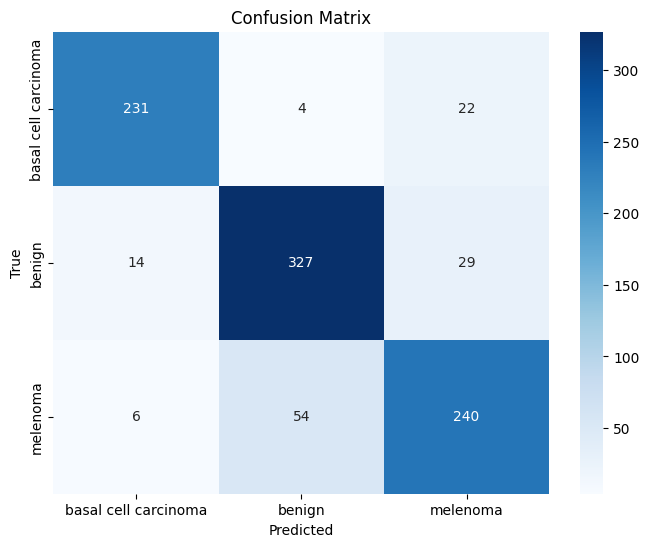

                      precision    recall  f1-score   support

basal cell carcinoma       0.92      0.90      0.91       257
              benign       0.85      0.88      0.87       370
            melenoma       0.82      0.80      0.81       300

            accuracy                           0.86       927
           macro avg       0.86      0.86      0.86       927
        weighted avg       0.86      0.86      0.86       927



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model('/content/drive/MyDrive/RM/cancer_densnet.h5')

# Define the test data directory
test_data_directory = "/content/drive/MyDrive/dataset/two_type/test"

# Create an ImageDataGenerator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain order for confusion matrix
)

# Get true labels from the generator
true_labels = test_data_generator.classes

# Make predictions using the model
predictions = model.predict(test_data_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data_generator.class_indices.keys(),
            yticklabels=test_data_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_data_generator.class_indices.keys())
print(class_report)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model('/content/drive/MyDrive/RM/cancer_densnet.h5')

# Define the test data directory
test_data_directory = "/content/drive/MyDrive/dataset/two_type/test"

# Create an ImageDataGenerator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain order
)

# Evaluate the model on the test data
accuracy = model.evaluate(test_data_generator)[1]

print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 927 images belonging to 3 classes.
29/29 [==============================] - 660s 23s/step - loss: 0.3676 - accuracy: 0.8608
Test Accuracy: 86.08%


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/RM/cancer_densnet.h5')

# Define the path to the image you want to predict
image_path = "/content/drive/MyDrive/dataset/two_type/train/benign/1001.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale pixel values

# Make a prediction
predictions = model.predict(img_array)

# Get the class labels from the generator
class_labels = list(test_data_generator.class_indices.keys())

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Print the prediction
print(f"Predicted class: {predicted_class_label}")


1/1 [==============================] - 2s 2s/step
Predicted class: benign


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/RM/cancer_densnet.h5')

# Path to the directory containing 10 test images
image_dir = '/content/drive/MyDrive/dataset/two_type/test'

# Load and preprocess a batch of 10 images
batch_size = 10
test_data_batch = test_datagen.flow_from_directory(directory=image_dir,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   batch_size=batch_size,
                                                   shuffle=False)

# Make predictions on the batch of 10 images
y_true_batch = test_data_batch.classes  # True labels
y_pred_prob_batch = model.predict(test_data_batch)  # Predicted probabilities
y_pred_batch = np.argmax(y_pred_prob_batch, axis=1)  # Predicted class labels

# Calculate accuracy
accuracy = np.sum(y_true_batch == y_pred_batch) / len(y_true_batch)
print("Accuracy on the batch of 10 images:", accuracy)


Found 927 images belonging to 3 classes.
93/93 [==============================] - 12s 95ms/step
Accuracy on the batch of 10 images: 0.86084142394822


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/RM/DENSENET_AAVISH.h5')

# Path to the image you want to predict
image_paths = [
    '/content/Basal-Cell-Carcinoma-hero.jpeg',
    '/content/basal-cell-carcinoma-1-shiny-bump.webp',
    '/content/melanoma.jpeg',
    '/content/melanoma2.jpg',
    '/content/melanoma3.jpeg',
    '/content/non.jpg',
    '/content/non2.jpeg',
    '/content/download (10).jpeg',
    '/content/mela.jpg',
    '/content/noncar.jpg',
    '/content/scc.jpg',
    '/content/Basalioma.jpg',
    '/content/Basal-cell-carcinoma-on-face.jpg',
    '/content/bccc.jpeg'
]

# Load and preprocess each image
for image_path in image_paths:
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image data

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    class_labels = ["basal cell carcinoma", "benign", "melanoma"]
    predicted_class_label = class_labels[predicted_class_index]

    # Print the result
    print(f"Image: {image_path}")
    print("Predicted Class Label:", predicted_class_label)
    print()


1/1 [==============================] - 2s 2s/step
Image: /content/Basal-Cell-Carcinoma-hero.jpeg
Predicted Class Label: basal cell carcinoma

1/1 [==============================] - 0s 42ms/step
Image: /content/basal-cell-carcinoma-1-shiny-bump.webp
Predicted Class Label: basal cell carcinoma

1/1 [==============================] - 0s 31ms/step
Image: /content/melanoma.jpeg
Predicted Class Label: melanoma

1/1 [==============================] - 0s 30ms/step
Image: /content/melanoma2.jpg
Predicted Class Label: melanoma

1/1 [==============================] - 0s 30ms/step
Image: /content/melanoma3.jpeg
Predicted Class Label: benign

1/1 [==============================] - 0s 31ms/step
Image: /content/non.jpg
Predicted Class Label: benign

1/1 [==============================] - 0s 32ms/step
Image: /content/non2.jpeg
Predicted Class Label: basal cell carcinoma

1/1 [==============================] - 0s 32ms/step
Image: /content/download (10).jpeg
Predicted Class Label: benign

1/1 [=========

In [ ]:
inceptionV3_model.save('inceptionV3().h5')